In [109]:
#install packages
!pip install sklearn

In [1]:
#import libraries
import numpy as np
import pandas as pd
from random import *
import math

In [3]:
#generate set of x,y coordinates in 2D space
#x,y = make_blobs(n_samples = 500,centers = 75,random_state = 1)
#S = pd.DataFrame(dict(x=x[:,0], y=x[:,-1]))
#print(S)

             x          y
0    -6.328647   6.337687
1   -10.698256   4.194336
2    -1.952667   0.863442
3     3.376861   2.463332
4     5.708816   4.041287
..         ...        ...
495  -4.608798   2.978665
496   1.548942  -9.961254
497 -10.035026   2.105023
498  -9.129288 -10.099482
499   7.682024  -2.742236

[500 rows x 2 columns]


In [28]:
#generate set of x,y coordinates
x = []
y = []
data = {}
seed(3)
for i in range(500):
    x_val = random()*15
    y_val = random()*15
    x.append(x_val)
    y.append(y_val)
    data = {"x":x,"y":y}

S = pd.DataFrame(data)
print(S)

             x          y
0     3.569469   8.163438
1     5.549327   9.058801
2     9.385805   0.982933
3     0.197520  12.562036
4     3.890310   3.514964
..         ...        ...
495  12.494645   3.006853
496   8.914663  13.991878
497  12.725159   2.691856
498  14.451756  12.600639
499   2.518775   3.988373

[500 rows x 2 columns]


In [3]:
#definition to check user validity
def checkPoint(point):
    while point.isnumeric() == False:
        point = input("Please enter an index value (integer) for the first point between 0 to 499:")
    if point.isnumeric():
        point = int(point)
        while point < 0 or point > 499:
            point = input("Please enter an index value (integer) for the first point between 0 to 499:")
            point = int(point)
        return int(point)

In [4]:
#ask user for index of first point
point1 = input("Please enter an index value (integer) for the first point between 0 to 499:")
#check point
point1 = checkPoint(point1)

#ask user for index to second point
point2 = input("Please enter a second index value(integer) for the second point between 0 to 499:") 
point2 = checkPoint(point2)


Please enter an index value (integer) for the first point between 0 to 499:56
Please enter a second index value(integer) for the second point between 0 to 499:67


In [5]:
#create function for calculating euclid_dist
def euclid_dist(point1,point2,S):
    x1 = S.x[point1]
    y1 = S.y[point1]
    x2 = S.x[point2]
    y2 = S.y[point2]
    diff_x = x2 - x1
    diff_y = y2 - y1
    euclid = math.sqrt(math.pow(diff_x,2) + math.pow(diff_y,2))
    return euclid

In [6]:
euclid_dist(point1,point2,S)

2.200624377584338

In [7]:
#using Statistics to find outliers
def outlier(S):
    q1 = S.quantile(0.25)
    q3 = S.quantile(0.75)
    q_range = q3-q1
    outliers = S[((S<(q1-1.5*q_range)) | (S>(q3+1.5*q_range)))]
    return outliers


In [29]:
#Check for Outliers
S_out = outlier(S)
if S_out.isnull().values.any() == True:
    print("No outliers found")
    S_prime = S
    print("Dataframe without Outliers:\n", S_prime)
else:
    print("Number of outliers: "+ str(len(S_out)))
    print("Max outlier value: " + str(S_out.max()))
    print("Min outlier value: "+ str(S_out.min()))
    S_prime = S_out.dropna()
    print("Dataframe without Outliers:\n", S_prime)



No outliers found
Dataframe without Outliers:
              x          y
0     3.569469   8.163438
1     5.549327   9.058801
2     9.385805   0.982933
3     0.197520  12.562036
4     3.890310   3.514964
..         ...        ...
495  12.494645   3.006853
496   8.914663  13.991878
497  12.725159   2.691856
498  14.451756  12.600639
499   2.518775   3.988373

[500 rows x 2 columns]


In [9]:
#Part 2 - implements the hierarchical agglomerative clustering algorithm
#import relevant libraries
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

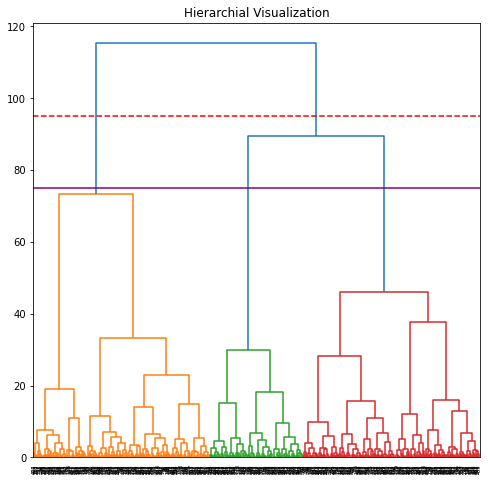

In [93]:
clusters = hierarchy.linkage(S_prime, method="ward")

plt.figure(figsize =(8, 8))
plt.title('Hierarchial Visualization')
Dendrogram = hierarchy.dendrogram(clusters)

# first biggest distance between clusters 
plt.axhline(95, color='red', linestyle='--'); 
# second biggest distance between clusters 
plt.axhline(75, color='purple'); 

In [17]:
#ask users to enter number of clusters
k = input("Please input the number of clusters you want:")
while k.isnumeric() == False:
    k = input("Please input a numerical value for the number of clusters want:")

k = int(k)

Please input the number of clusters you want:3


In [18]:
#create clustering model
clust = AgglomerativeClustering(n_clusters = k, linkage="ward")
clust.fit(S_prime)
labels = clust.labels_

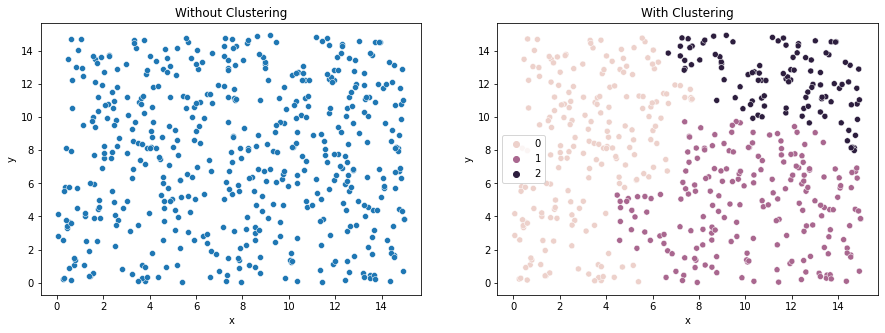

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0],data=S_prime,x=S_prime.x,y=S_prime.y).set_title('Without Clustering')
sns.scatterplot(ax=axes[1],data=S_prime,x=S_prime.x,y=S_prime.y, hue=labels).set_title('With Clustering');

Text(0.5, 1.0, 'Find Optimum Number of Clusters')

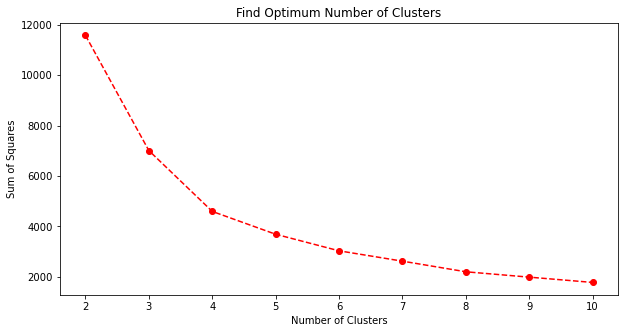

In [30]:
numClust = list(range(2,11))
dist = []
for i in numClust:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(S_prime)
    dist.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(numClust, dist, 'ro--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares')
plt.title('Find Optimum Number of Clusters')

In [31]:
kmodel = KMeans(n_clusters=k, random_state=1)
kmodel.fit_predict(S_prime)
score = silhouette_score(S_prime, kmodel.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.400
